## Import libraries

In [2]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
from sklearn.model_selection import train_test_split
from datetime import datetime
import time

# Plotting
import matplotlib.pyplot as plt

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
sys.path.append("myfun/")
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.full.myfun_model_nn_v2 import *
from ipynb.fs.defs.myfun_plot import *

2024-03-03 15:49:04.478346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 15:49:04.478380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 15:49:04.479706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 15:49:04.485963: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 15:49:05.430914: W tensorflow/compiler/tf2

## Data Acquisition

In [3]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"

In [4]:
processed_flag = 'post'
# load the data
_, dflist = load_dataset(dir_name, processed_flag)
dataset = dflist

In [90]:
cd_dataset = []
for step, d in enumerate(dataset):
#     print(step)
    cd_d = []
    
#     print(fr"We have {len(d)} scenes.")
    
    for cd_scn in d["cons_dis"]:
        tmp = np.min(cd_scn)
        cd_d.append(tmp)
#         print(fr"The min consecutive distance is: {tmp}")
    
#     width, height = 7, 4.5 # single subplot
#     fig, axs = plt.subplots(1, 1, figsize=(width*.75,height*.75))
#     axs.hist(cd_d, bins=len(cd_d))
#     axs.set_title(fr"cons_dis distribution - df n.{step}")
    
    plt.show()
    
#     print(len(cd_d))
#     print("=="*50)
    cd_dataset.append(cd_d)

In [91]:
cd_dataset = []
for d in dataset:
    cd_d = []
    
    [cd_d.append(np.min(cd_scn)) for cd_scn in d["cons_dis"]]

    cd_dataset.append(cd_d)

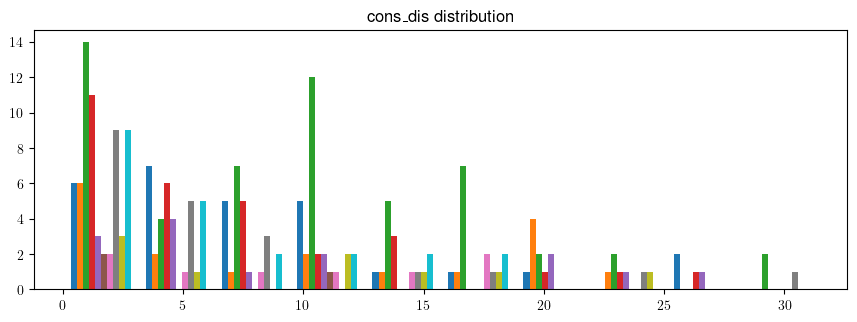

In [87]:
width, height = 14, 4.5 # single subplot
fig, axs = plt.subplots(1, 1, figsize=(width*.75,height*.75))
axs.hist(cd_dataset, bins=len(cd_dataset))
axs.set_title(fr"cons_dis distribution")

plt.show()

In [84]:
soglia = 1
l = [1 for cd_d in cd_dataset for cd_scn in cd_d if cd_scn<soglia]
print(fr"There are {len(l)} min distances less than {soglia}.")

There are 39 min distances less than 1.


In [120]:
cd_dataset_flat = [cd_scn for cd_d in cd_dataset for cd_scn in cd_d]
perc = 0.2
threshold = int(len(cd_dataset_flat)*perc)

l = []
ll = cd_dataset_flat.copy()

while(len(l)<threshold):
    mmin = np.min(ll)
    imin = ll.index(mmin)
    l.append(mmin), ll.pop(imin)
    
threshold_min = l[-1]

In [121]:
l[-1]

1.0314439568624607